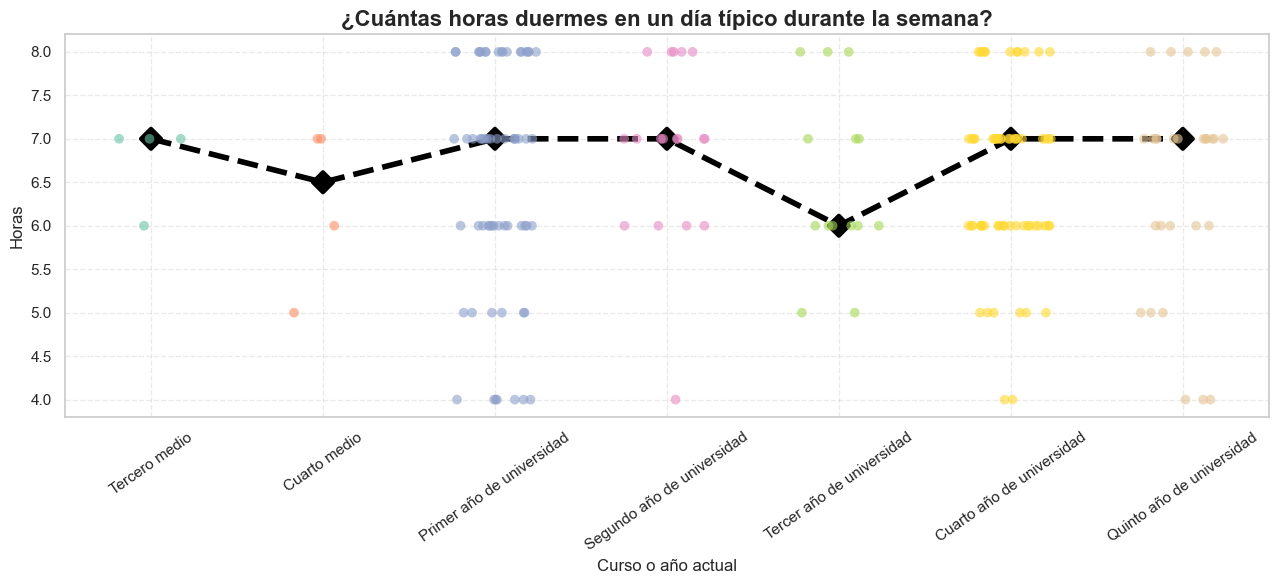

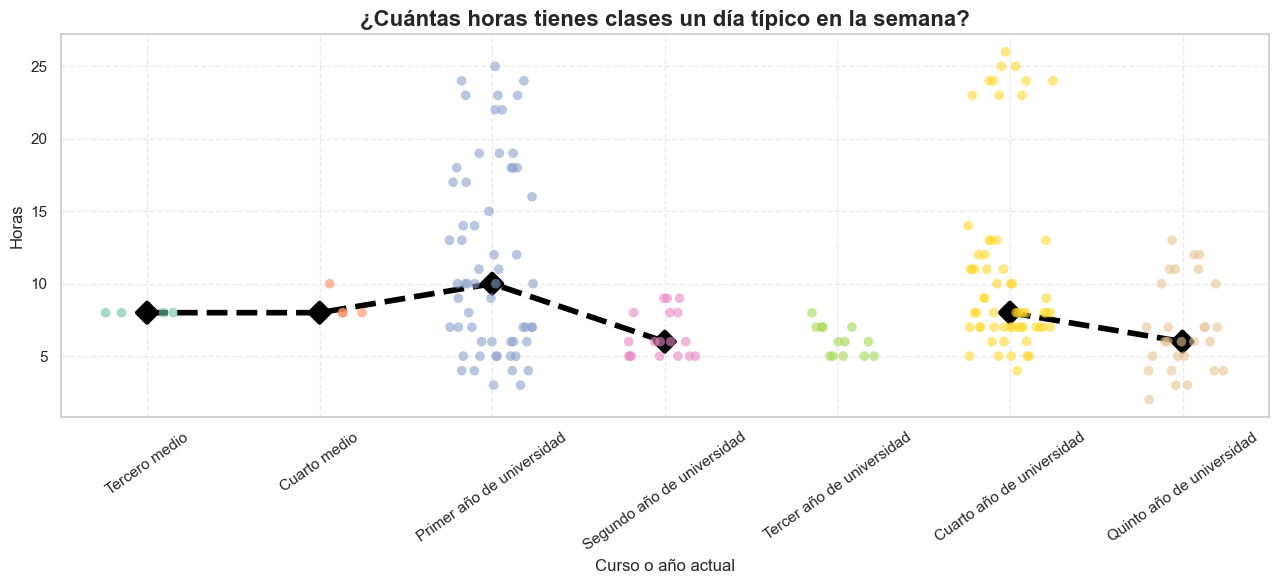

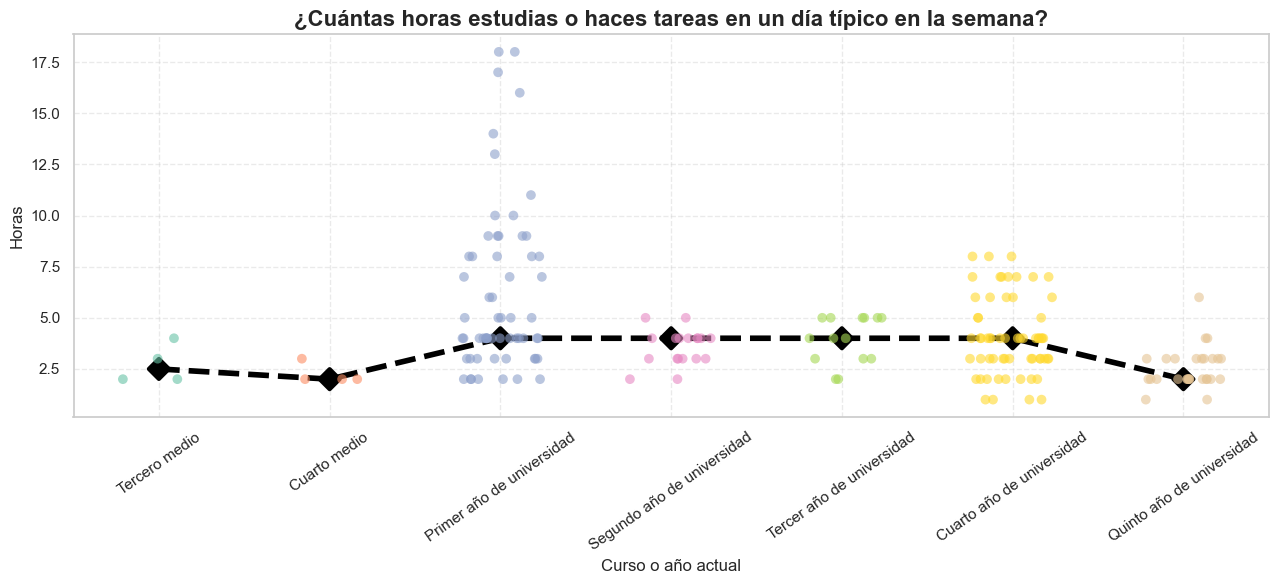

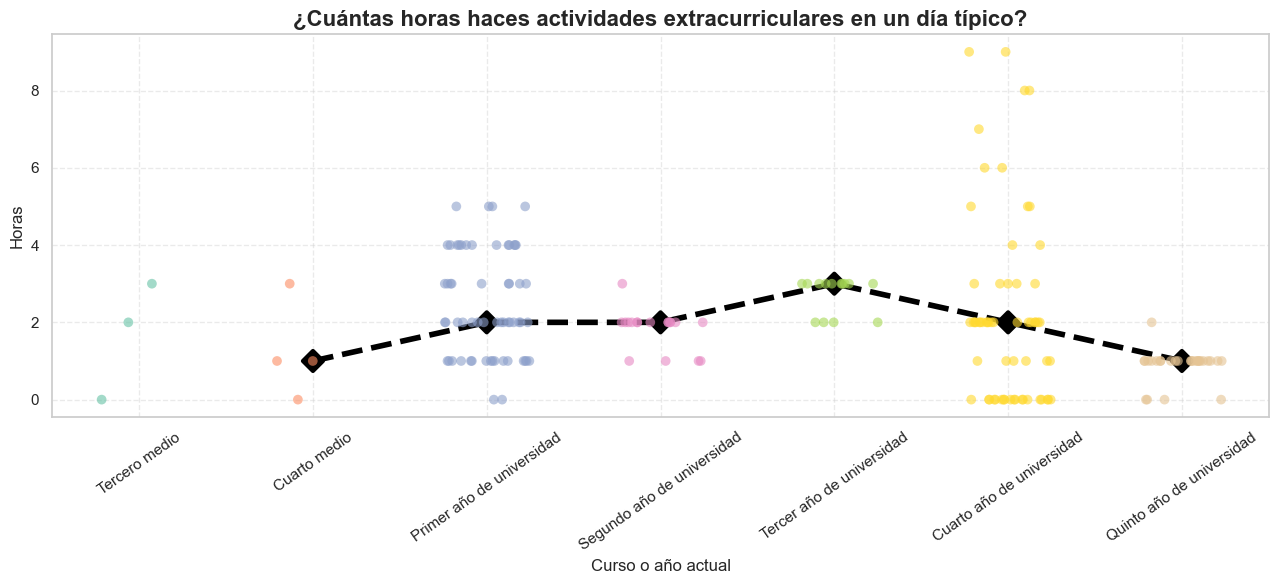

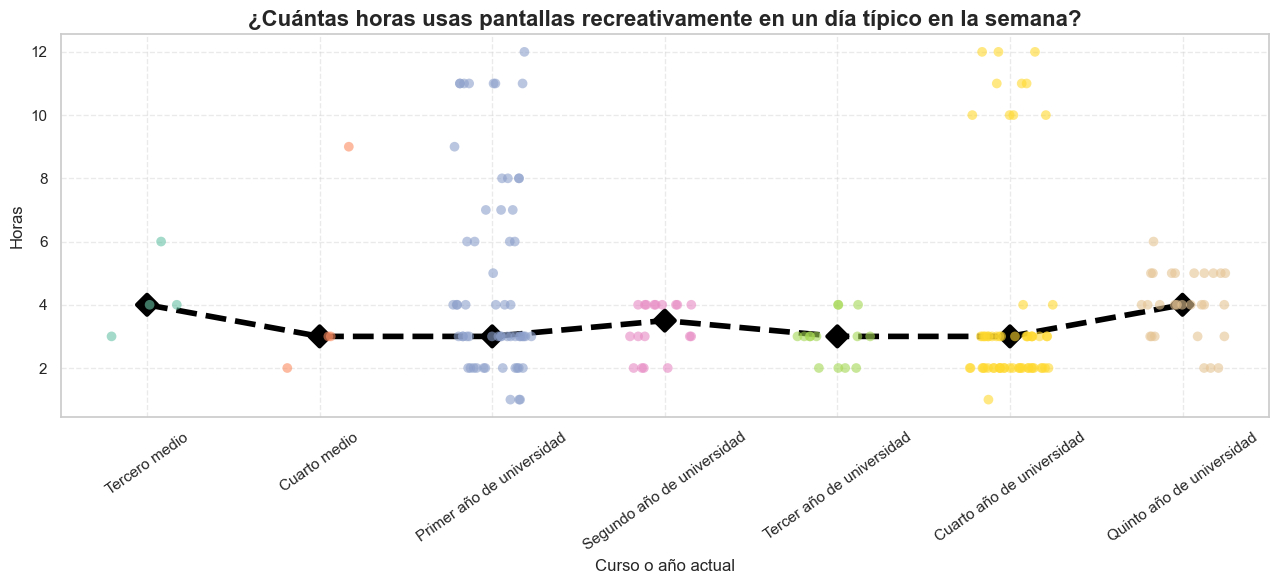

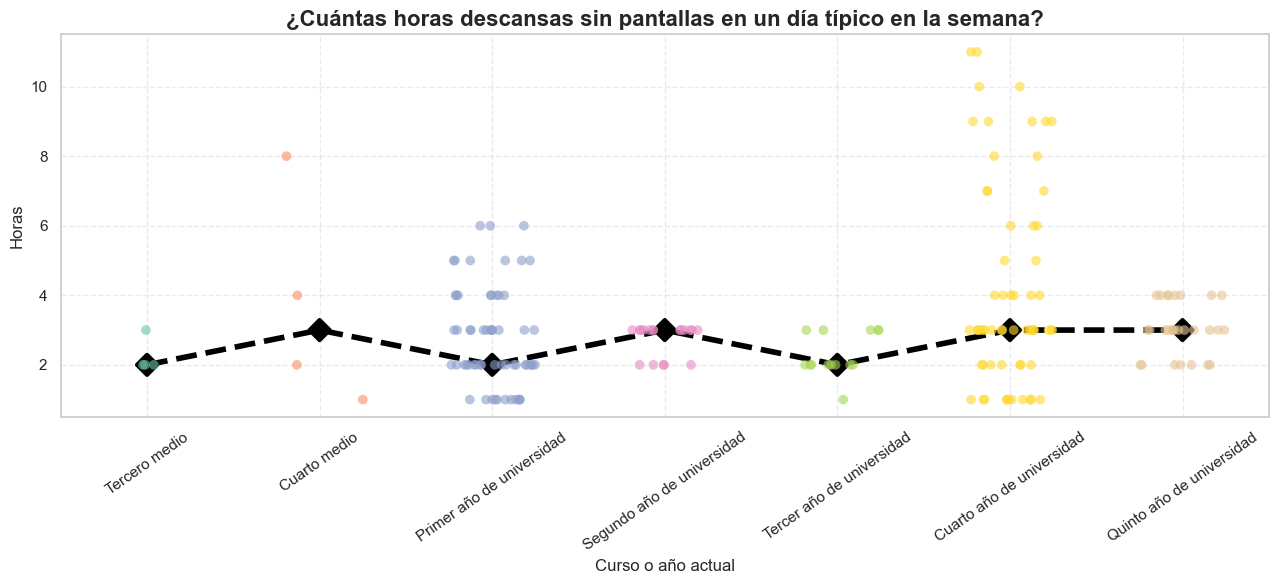

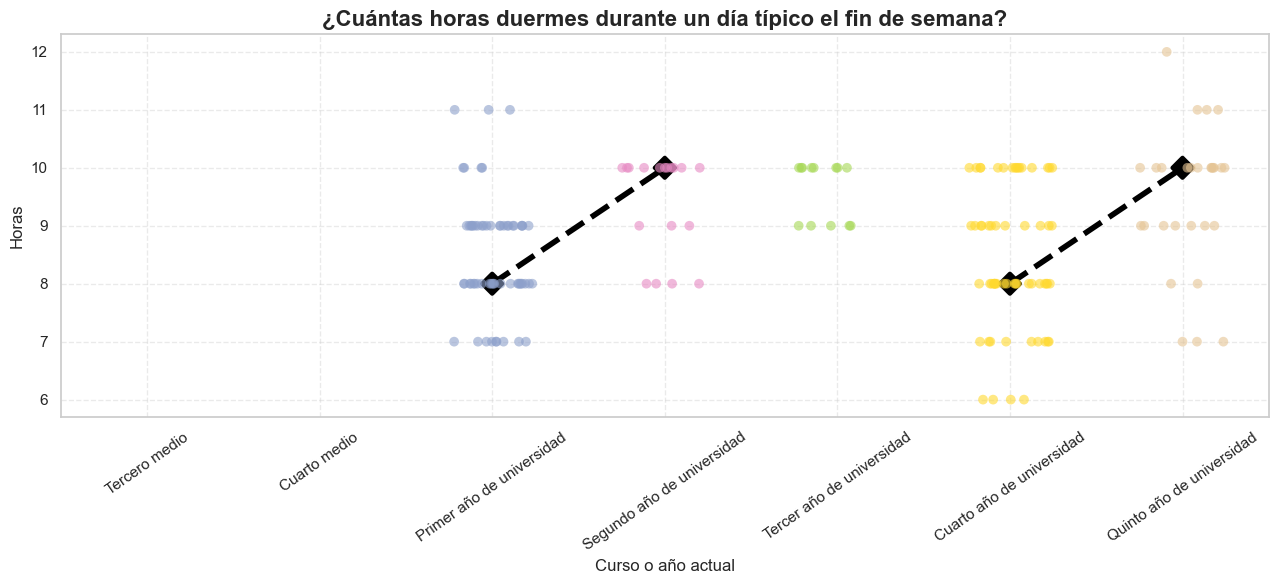

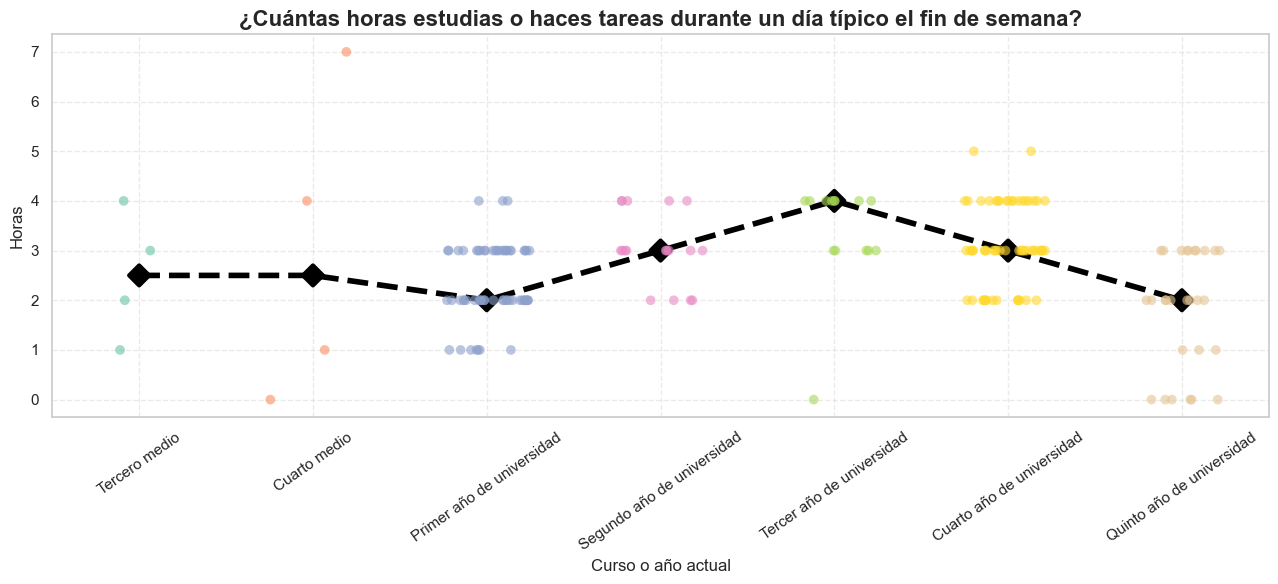

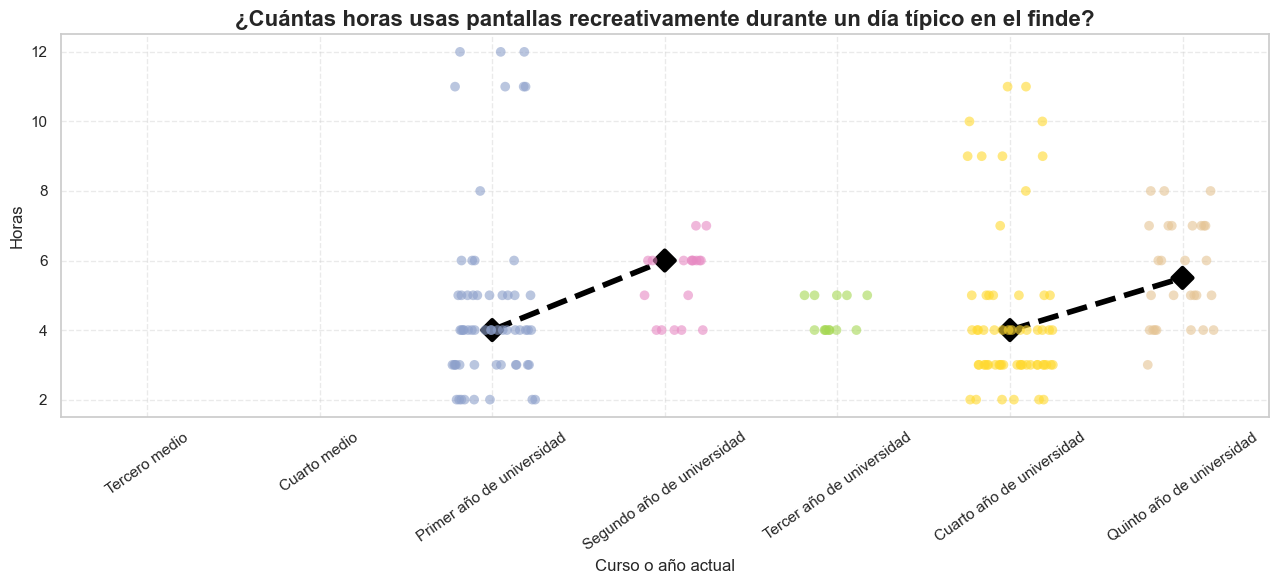

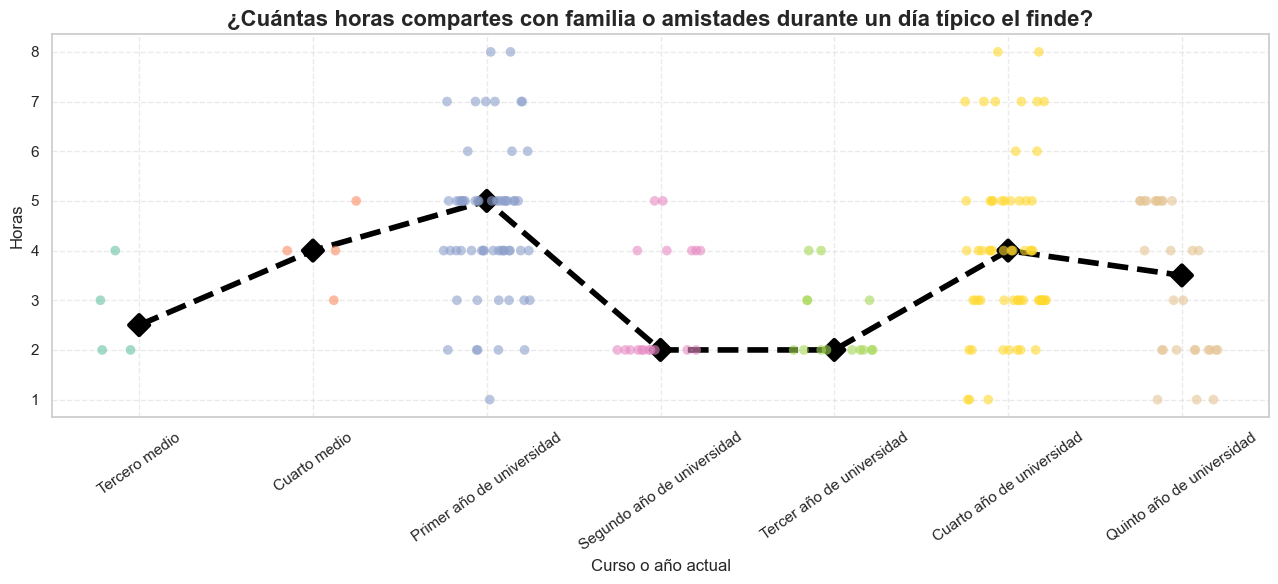

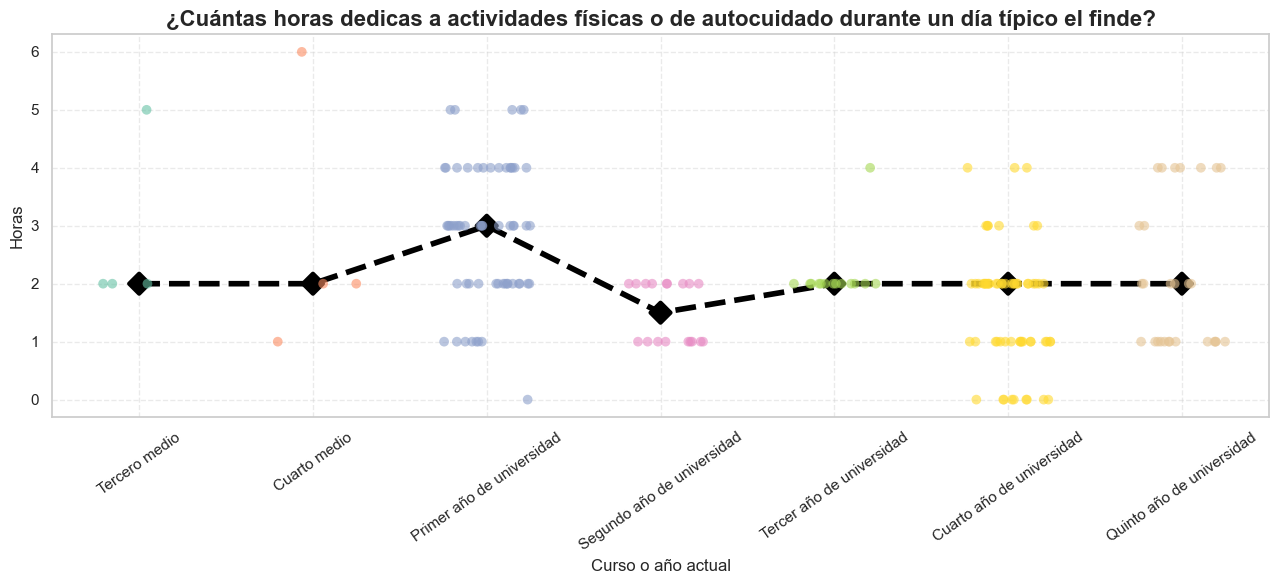

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Estilo visual
sns.set(style="whitegrid", palette="pastel")

# Diccionario de preguntas
preguntas_dict = {
    "Horas de sueño (semana)": "¿Cuántas horas duermes en un día típico durante la semana?",
    "Horas de clases (semana)": "¿Cuántas horas tienes clases un día típico en la semana?",
    "Horas de estudio/tareas (semana)": "¿Cuántas horas estudias o haces tareas en un día típico en la semana?",
    "Horas extracurriculares (semana)": "¿Cuántas horas haces actividades extracurriculares en un día típico?",
    "Horas pantallas recreativas (semana)": "¿Cuántas horas usas pantallas recreativamente en un día típico en la semana?",
    "Horas descanso sin pantallas (semana)": "¿Cuántas horas descansas sin pantallas en un día típico en la semana?",
    "Horas de sueño (fin de semana)": "¿Cuántas horas duermes durante un día típico el fin de semana?",
    "Horas de estudio/tareas (fin de semana)": "¿Cuántas horas estudias o haces tareas durante un día típico el fin de semana?",
    "Horas pantallas recreativas (fin de semana)": "¿Cuántas horas usas pantallas recreativamente durante un día típico en el finde?",
    "Horas con familia o amistades (fin de semana)": "¿Cuántas horas compartes con familia o amistades durante un día típico el finde?",
    "Horas autocuidado (fin de semana)": "¿Cuántas horas dedicas a actividades físicas o de autocuidado durante un día típico el finde?"
}

# Orden lógico de cursos: colegio + universidad
orden_total = [
    "Tercero medio", "Cuarto medio",
    "Primer año de universidad", "Segundo año de universidad",
    "Tercer año de universidad", "Cuarto año de universidad",
    "Quinto año de universidad"
]

# --- Cargar estudiantes universitarios ---
data_uni = pd.read_csv('data_estudiantes_ingenieria.csv')
df_uni = data_uni.melt(
    id_vars=["Curso o año actual"],
    value_vars=list(preguntas_dict.keys()),
    var_name="Pregunta",
    value_name="Horas"
)

# --- Cargar estudiantes de colegio ---
data_colegio = pd.read_csv('Encuesta_Colegio_Corregida.csv')  # <- Asegúrate de tener este archivo
#data_colegio = pd.read_csv('data_estudiantes_colegio.csv')  # <- Asegúrate de tener este archivo
df_colegio = data_colegio.melt(
    id_vars=["Curso o año actual"],
    value_vars=list(preguntas_dict.keys()),
    var_name="Pregunta",
    value_name="Horas"
)

# --- Unir ambos datasets ---
df_todos = pd.concat([df_uni, df_colegio], axis=0)

# --- Establecer orden lógico del eje X ---
df_todos["Curso o año actual"] = pd.Categorical(
    df_todos["Curso o año actual"], categories=orden_total, ordered=True
)

# --- Graficar por pregunta ---
for columna, pregunta in preguntas_dict.items():
    plt.figure(figsize=(13, 6))

    subset = df_todos[df_todos["Pregunta"] == columna]

    # Dispersión por curso o año
    sns.stripplot(
        data=subset,
        x="Curso o año actual",
        y="Horas",
        hue="Curso o año actual",
        jitter=0.25,
        dodge=False,
        alpha=0.6,
        size=7,
        palette="Set2",
        legend=False
    )

    # Promedio por curso o año
    sns.pointplot(
        data=subset,
        x="Curso o año actual",
        y="Horas",
        estimator=np.median,
        color="black",
        markers="D",
        linestyles="--",
        scale=1.5,
        errorbar=None
    )

    plt.title(pregunta, fontsize=16, fontweight="bold")
    plt.xlabel("Curso o año actual", fontsize=12)
    plt.ylabel("Horas", fontsize=12)
    plt.xticks(rotation=35)
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()
